In [25]:
import csv
import numpy as np
from typing import Set,Tuple, List
import torch
import torch.utils
import torch.utils.data
import torch.nn as nn
import torchvision
NoneType = type(None)
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image
import torchvision.transforms.functional as TF
from torchvision.models import vgg11
from torchvision.models import mobilenet_v2
import torchvision.transforms as transforms
import time


<h1 id="exercise-1"><strong>Exercise 1</strong></h1>


<font size="4px"><p>This method returns the fruit name by getting the string at a specific index of the set.</p>
<dl>
<dt>param fruit_id</dt>
<dd><p>The id of the fruit to get</p>
</dd>
<dt>param fruits</dt>
<dd><p>The set of fruits to choose the id from</p>
</dd>
<dt>return</dt>
<dd><p>The string corrosponding to the index <code>fruit_id</code></p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<div class="line-block"><code>1   It does not print the fruit at the correct index, why is the returned result wrong?</code><br />
<code>2   How could this be fixed?</code></div>
<p>This example demonstrates the issue: name1, name3 and name4 are expected to correspond to the strings at the indices 1, 3, and 4: 'orange', 'kiwi' and 'strawberry'..</p>
</font>

In [11]:
# You can copy this code to your personal pipeline project or execute it here.
from typing import Set
def id_to_fruit(fruit_id: int, fruits: Set[str]) -> str:
    """

    | ``1   It does not print the fruit at the correct index, why is the returned result wrong?``
        The set does not maintain the order of its elements
        
    | ``2   How could this be fixed?``
        use a list instead of a set to preserve the order, or define a order.
        

    """
    predefined_order = ["apple", "orange", "melon", "kiwi", "strawberry"]

    return predefined_order[fruit_id]
"""
def get_fruit_by_id(fruit_id: int, fruits: List[str]) -> str:
    # Return the fruit at the specific index
    return fruits[fruit_id]
"""


'\ndef get_fruit_by_id(fruit_id: int, fruits: List[str]) -> str:\n    # Return the fruit at the specific index\n    return fruits[fruit_id]\n'

In [12]:
name1 = id_to_fruit(1, {"apple", "orange", "melon", "kiwi", "strawberry"})
name3 = id_to_fruit(3, {"apple", "orange", "melon", "kiwi", "strawberry"})
name4 = id_to_fruit(4, {"apple", "orange", "melon", "kiwi", "strawberry"})

print(name1)
print(name3)
print(name4)

orange
kiwi
strawberry


<h1 id="exercise-2"><strong>Exercise 2</strong></h1>


<font size="4px"><p>This method will flip the x and y coordinates in the coords array.</p>
<dl>
<dt>param coords</dt>
<dd><p>A numpy array of bounding box coordinates with shape [n,5] in format: :</p>
<pre><code>[[x11, y11, x12, y12, classid1],
 [x21, y21, x22, y22, classid2],
 ...
 [xn1, yn1, xn2, yn2, classid3]]</code></pre>
</dd>
<dt>return</dt>
<dd><p>The new numpy array where the x and y coordinates are flipped.</p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<div class="line-block"><code>1   Can you spot the obvious error?</code><br />
<code>2   After fixing the obvious error it is still wrong, how can this be fixed?</code></div>
</font>

<font size="4px"><p>The example demonstrates the issue. The returned swapped_coords are expected to have swapped x and y coordinates in each of the rows.</p>
</font>

In [14]:
# You can copy this code to your personal pipeline project or execute it here.
import numpy as np
def swap(coords: np.ndarray):
    """

    | ``1   Can you spot the obvious error?``
        the first two coordinates (coords[:, 0] and coords[:, 1]) are both being set to coords[:, 1]
        the second column(coords[:, 1]) should get frist column's value(coords[:, 0])
        
    | ``2   After fixing the obvious error it is still wrong, how can this be fixed?``
        make sure they switch in same time
        ensuring that each of the x and y pairs are swapped correctly without overwriting one another

    """
    coords[:, [0, 1]] = coords[:, [1, 0]]  # Swap the first x and y coordinates
    coords[:, [2, 3]] = coords[:, [3, 2]]  # Swap the second x and y coordinates
    return coords



In [15]:
import numpy as np
coords = np.array([[10, 5, 15, 6, 0],
                   [11, 3, 13, 6, 0],
                   [5, 3, 13, 6, 1],
                   [4, 4, 13, 6, 1],
                   [6, 5, 13, 16, 1]])
swapped_coords = swap(coords)
print(swapped_coords)

[[ 5 10  6 15  0]
 [ 3 11  6 13  0]
 [ 3  5  6 13  1]
 [ 4  4  6 13  1]
 [ 5  6 16 13  1]]


<h1 id="exercise-3"><strong>Exercise 3</strong></h1>


<font size="4px"><p>This code plots the precision-recall curve based on data from a .csv file, where precision is on the x-axis and recall is on the y-axis. It it not so important right now what precision and recall means.</p>
<dl>
<dt>param csv_file_path</dt>
<dd><p>The CSV file containing the data to plot.</p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<div class="line-block"><code>1   For some reason the plot is not showing correctly, can you find out what is going wrong?</code><br />
<code>2   How could this be fixed?</code></div>
<p>This example demonstrates the issue. It first generates some data in a csv file format and the plots it using the <code>plot_data</code> method. If you manually check the coordinates and then check the plot, they do not correspond.</p>
</font>

In [20]:
import csv
from matplotlib import pyplot as plt
# You can copy this code to your personal pipeline project or execute it here.
def plot_data(csv_file_path: str):
    """

    | ``1   For some reason the plot is not showing correctly, can you find out what is going wrong?``
        it has a empty row between two data row
        We should skip the row 

        What we append to result is strings instead of float, So pyplot cannot show it
        results[:, 1] refers to the second column (which should be recall) 
        and results[:, 0] refers to the first column (which should be precision)
        
    | ``2   How could this be fixed?``
        swap the order of the columns when passing them to plt.plot()
        so that precision is on the x-axis and recall is on the y-axis
    
    """
    # load data
    results = []
    with open(csv_file_path) as result_csv:
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader)
        for row in csv_reader:
            if len(row) < 2:  # Check if the row has fewer than 2 elements
                continue  # Skip this row
            try:
                results.append([float(row[0]), float(row[1])])  # Convert to float
            except ValueError:
                print(f"Skipping invalid row: {row}")
                continue  # Skip rows with non-numeric data
        results = np.stack(results)

    # plot precision-recall curve
    plt.plot(results[:, 0], results[:, 1])
    plt.ylim([-0.05, 1.05])
    plt.xlim([-0.05, 1.05])
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.show()
    """
    def plot_data(path: str):
    df = pd.read_csv("data_file.csv")
    plt.plot(df['precision'], df['recall'])
    plt.show()
    """



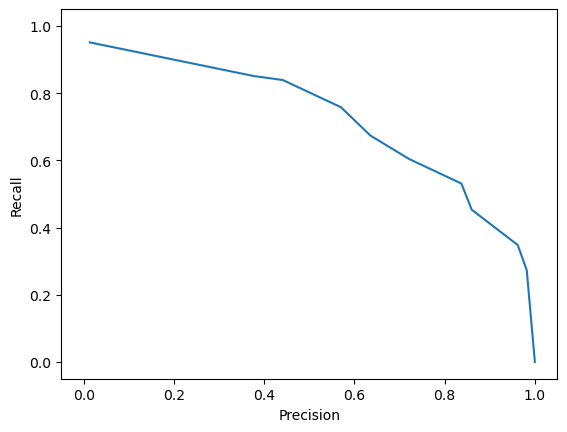

In [21]:
f = open("data_file.csv", "w")
w = csv.writer(f)
_ = w.writerow(["precision", "recall"])
w.writerows([[0.013,0.951],
             [0.376,0.851],
             [0.441,0.839],
             [0.570,0.758],
             [0.635,0.674],
             [0.721,0.604],
             [0.837,0.531],
             [0.860,0.453],
             [0.962,0.348],
             [0.982,0.273],
             [1.0,0.0]])
f.close()
plot_data('data_file.csv')


<h1 id="generator-for-exercise-4">** Generator (for Exercise 4)**</h1>


<font size="4px"><p>Generator class for the GAN</p>
</font>

In [11]:
# Conditional Generator
class Generator(nn.Module):
    """
    Conditional Generator class for GAN
    """
    def __init__(self):
        super().__init__()
        self.label_embedding = nn.Embedding(10, 10)  # Embedding for 10 labels
        self.model = nn.Sequential(
            nn.Linear(100 + 10, 256),  # Input size is noise + label embedding
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, noise, labels):
        label_embedded = self.label_embedding(labels)  # Get label embeddings
        input = torch.cat((noise, label_embedded), dim=1)  # Concatenate noise and label
        output = self.model(input)
        return output.view(-1, 1, 28, 28)  # Reshape output to image format



<h1 id="discriminator-for-exercise-4">** Discriminator (for Exercise 4)**</h1>


<font size="4px"><p>Discriminator class for the GAN</p>
</font>

In [12]:
# Conditional Discriminator
class Discriminator(nn.Module):
    """
    Conditional Discriminator class for GAN
    """
    def __init__(self):
        super().__init__()
        self.label_embedding = nn.Embedding(10, 784)  # Embedding for 10 labels
        self.model = nn.Sequential(
            nn.Linear(784 + 784, 1024),  # Input size is image + label embedding
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, images, labels):
        label_embedded = self.label_embedding(labels)  # Get label embeddings
        input = torch.cat((images.view(images.size(0), -1), label_embedded), dim=1)  # Concatenate image and label
        output = self.model(input)
        return output


<h1 id="exercise-4">** Exercise 4**</h1>


<font size="4px"><p>The method trains a Generative Adversarial Network and is based on: <a href="https://realpython.com/generative-adversarial-networks/">https://realpython.com/generative-adversarial-networks/</a></p>
<p>The Generator network tries to generate convincing images of handwritten digits. The Discriminator needs to detect if the image was created by the Generater or if the image is a real image from a known dataset (MNIST). If both the Generator and the Discriminator are optimized, the Generator is able to create images that are difficult to distinguish from real images. This is goal of a GAN.</p>
<p>This code produces the expected results at first attempt at about 50 epochs.</p>
<dl>
<dt>param batch_size</dt>
<dd><p>The number of images to train in one epoch.</p>
</dd>
<dt>param num_epochs</dt>
<dd><p>The number of epochs to train the gan.</p>
</dd>
<dt>param device</dt>
<dd><p>The computing device to use. If CUDA is installed and working then <span class="title-ref">cuda:0</span> is chosen otherwise 'cpu' is chosen. Note: Training a GAN on the CPU is very slow.</p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<p>It contains at least two bugs: one structural bug and one cosmetic bug. Both bugs are from the original tutorial.</p>
<div class="line-block"><code>1   Changing the batch_size from 32 to 64 triggers the structural bug.</code><br />
<code>2   Can you also spot the cosmetic bug?</code><br />
<code>Note: to fix this bug a thorough understanding of GANs is not necessary.</code></div>
<p>Change the batch size to 64 to trigger the bug with message: ValueError: "Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size."</p>
</font>

In [23]:
# You can copy this code to your personal pipeline project or execute it here.
"""
| ``1   Changing the batch_size from 32 to 64 triggers the structural bug.``
        mnist dataset have 60000 pictures as intput, which can divided by 32 without left, but 64 will left a 32, 
        the len of output_discriminator is fixed 128, but all_samples_labels can change, 
        because it’s half real_samples and half generated_sample, could be 32+64
        they cannot calculate loss if size are not matching
            use "batch_size_current = real_samples.size(0)" to get current batch_size

         
         
    | ``2   Can you also spot the cosmetic bug?``
        there is no labels for pictures we generated, so it cannot be seen if it's wrong
        
        after add the label for pictures, we can find the match between picture and label are wrong
            because original generator and discriminator train without labels, so they can only generator randomly
            change original generator and discriminator with Conditional Generator and Conditional Discriminator

        there are no test data, our model is over fitting
    
        The generator and discriminator losses are not printed for each epoch. They are only printed for the last batch of each epoch
            # Calculate average losses for the epoch
            avg_loss_d = total_loss_d / num_batches
            avg_loss_g = total_loss_g / num_batches

        Generated samples are labeled as 0 instead of random labels between 0-1. This makes it too easy for the discriminator.
            generated_samples_labels = torch.rand((batch_size_current, 1)).to(device=device)

"""
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

# Conditional Generator
class Generator(nn.Module):
    """
    Conditional Generator class for GAN
    """
    def __init__(self):
        super().__init__()
        self.label_embedding = nn.Embedding(10, 10)  # Embedding for 10 labels
        self.model = nn.Sequential(
            nn.Linear(100 + 10, 256),  # Input size is noise + label embedding
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, noise, labels):
        label_embedded = self.label_embedding(labels)  # Get label embeddings
        input = torch.cat((noise, label_embedded), dim=1)  # Concatenate noise and label
        output = self.model(input)
        return output.view(-1, 1, 28, 28)  # Reshape output to image format


# Conditional Discriminator
class Discriminator(nn.Module):
    """
    Conditional Discriminator class for GAN
    """
    def __init__(self):
        super().__init__()
        self.label_embedding = nn.Embedding(10, 784)  # Embedding for 10 labels
        self.model = nn.Sequential(
            nn.Linear(784 + 784, 1024),  # Input size is image + label embedding
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, images, labels):
        label_embedded = self.label_embedding(labels)  # Get label embeddings
        input = torch.cat((images.view(images.size(0), -1), label_embedded), dim=1)  # Concatenate image and label
        output = self.model(input)
        return output

def train_gan(batch_size: int = 32, num_epochs: int = 100, device: str = "cuda:0" if torch.cuda.is_available() else "cpu"):
    """
    Train the GAN and display generated images with corresponding labels.
    """
    # Add/adjust code.

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    try:
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    except:
        print("Failed to download MNIST, retrying with different URL")
        # see: https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py
        torchvision.datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
             'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
             'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz',
             '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',
             'ec29112dd5afa0611ce80d1b7f02629c')
        ]
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

    # example data
    real_samples, mnist_labels = next(iter(train_loader))
    
    fig = plt.figure()
    for i in range(16):
        sub = fig.add_subplot(4, 4, 1 + i)
        sub.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
        sub.axis('off')

    fig.tight_layout()
    fig.suptitle("Real images")
    display(fig)

    time.sleep(5)

    # Set up training
    discriminator = Discriminator().to(device)
    generator = Generator().to(device)
    lr = 0.0001
    loss_function = nn.BCELoss()
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

    for epoch in range(num_epochs):
        # Initialize the total loss variables
        total_loss_d = 0.0
        total_loss_g = 0.0
        num_batches = 0
        
        for n, (real_samples, mnist_labels) in enumerate(train_loader):
            batch_size_current = real_samples.size(0)#***

            # Data for training the discriminator
            real_samples = real_samples.to(device=device)
            mnist_labels = mnist_labels.to(device=device)#***
            real_samples_labels = torch.ones((batch_size_current, 1)).to(device=device)
            
            latent_space_samples = torch.randn((batch_size_current, 100)).to(device=device)
            generated_samples = generator(latent_space_samples, mnist_labels)#***
            generated_samples_labels = torch.zeros((batch_size_current, 1)).to(device=device)
            all_samples = torch.cat((real_samples, generated_samples))
            all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples, torch.cat((mnist_labels, mnist_labels)))#***
            loss_discriminator = loss_function(output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

            # Data for training the generator
            latent_space_samples = torch.randn((batch_size_current, 100)).to(device=device)
            random_labels = torch.randint(0, 10, (batch_size_current,), device=device)#***

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples, mnist_labels)#***
            output_discriminator_generated = discriminator(generated_samples, mnist_labels)#***
            loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
            loss_generator.backward()
            optimizer_generator.step()

            # Accumulate losses
            total_loss_d += loss_discriminator.item()
            total_loss_g += loss_generator.item()
            num_batches += 1
            
        # Calculate average losses for the epoch
        avg_loss_d = total_loss_d / num_batches
        avg_loss_g = total_loss_g / num_batches

        # Show average loss and generated samples at the end of the epoch
        name = f"Generate images\n Epoch: {epoch} Avg Loss D.: {avg_loss_d:.2f} Avg Loss G.: {avg_loss_g:.2f}"
        
        # Generate samples for display
        random_labels = torch.randint(0, 10, (16,), device=device)#***Random labels for generated images
        latent_space_samples = torch.randn((16, 100)).to(device=device)#*** Random noise
        generated_samples = generator(latent_space_samples, random_labels)#***
        
        fig = plt.figure()
        
        # Show loss and samples generated
        for i in range(16):
            sub = fig.add_subplot(4, 4, 1 + i)
            sub.imshow(generated_samples[i].detach().cpu().numpy().reshape(28, 28), cmap="gray_r")
            sub.axis('off')
            sub.set_title(f"Label: {random_labels[i].item()}", fontsize=8)  # Add label above the image
            
        fig.suptitle(name, fontsize=16)
        fig.tight_layout()
        clear_output(wait=False)
        display(fig)




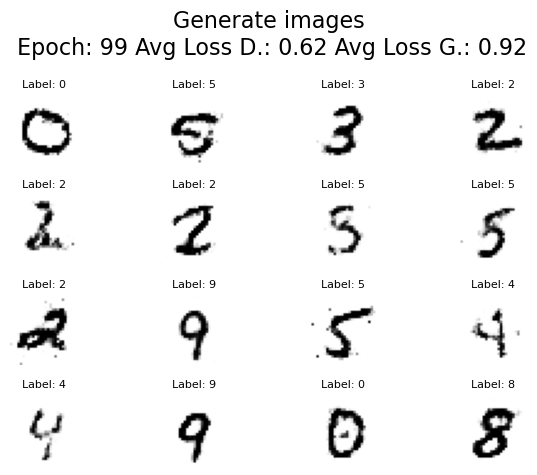

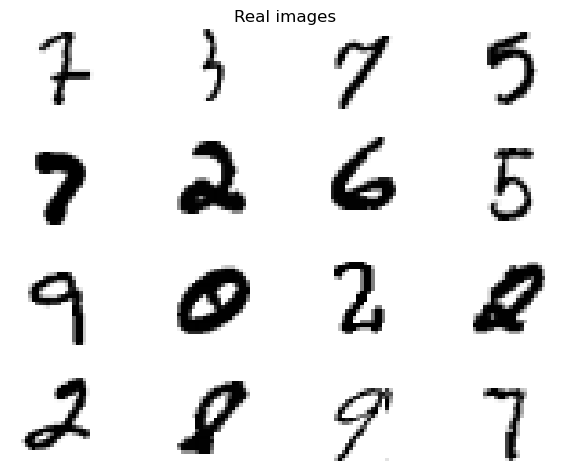

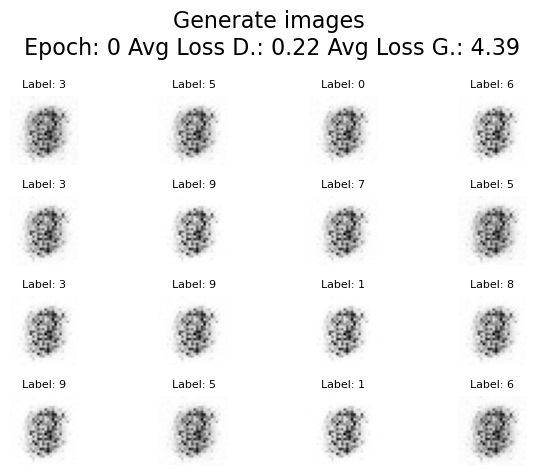

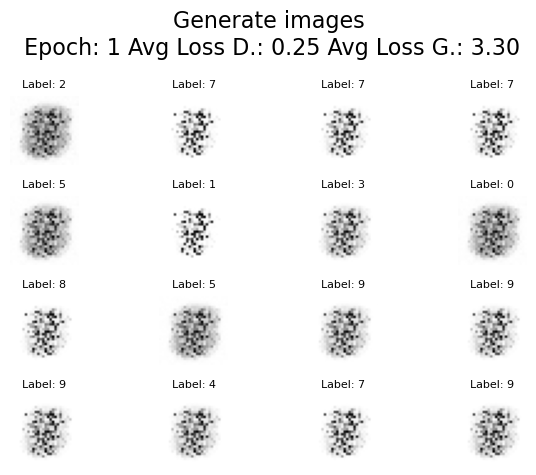

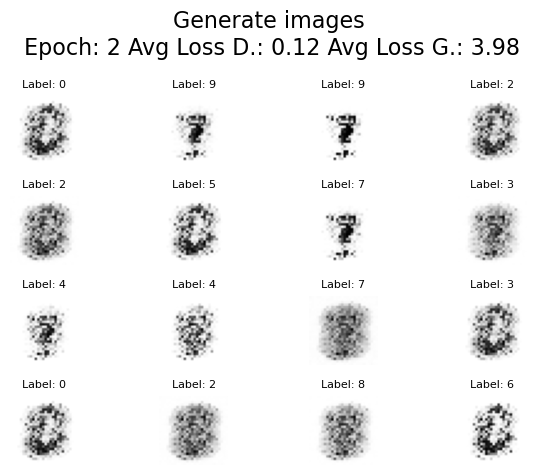

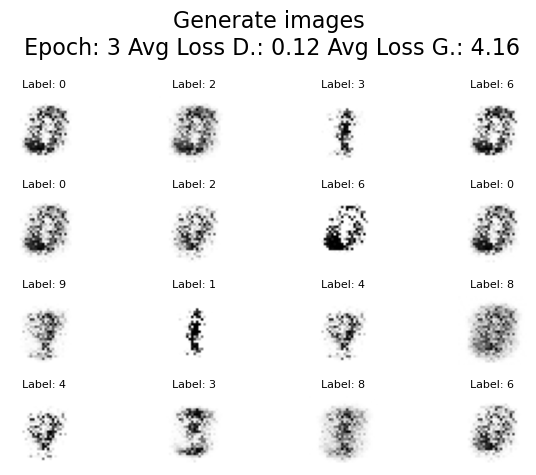

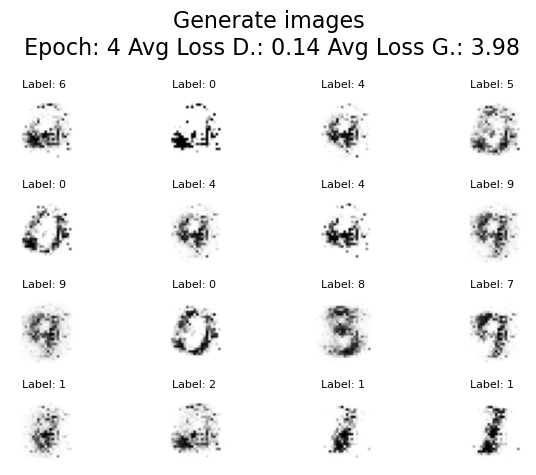

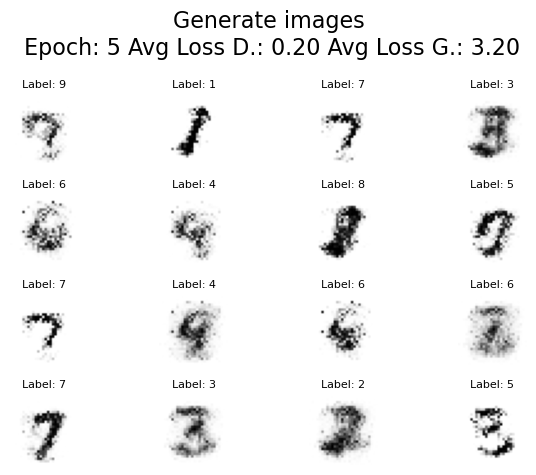

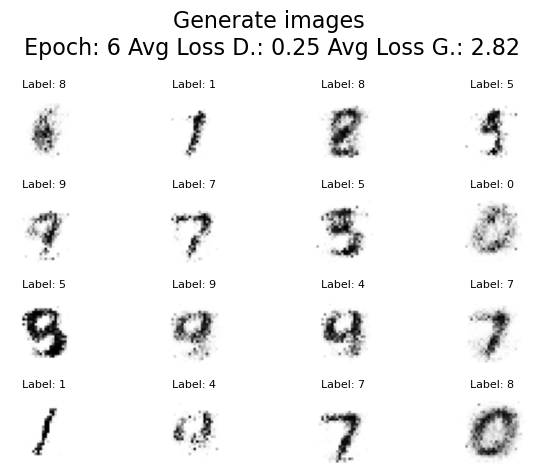

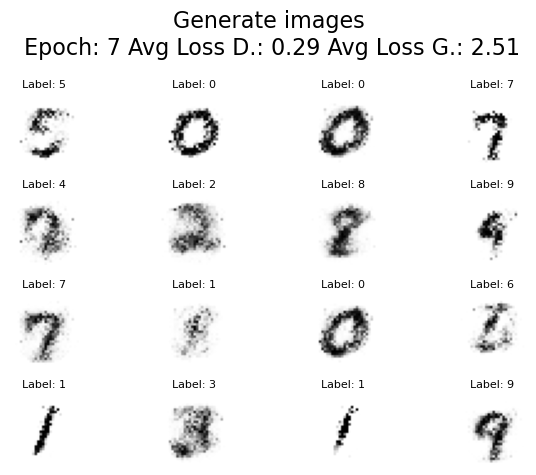

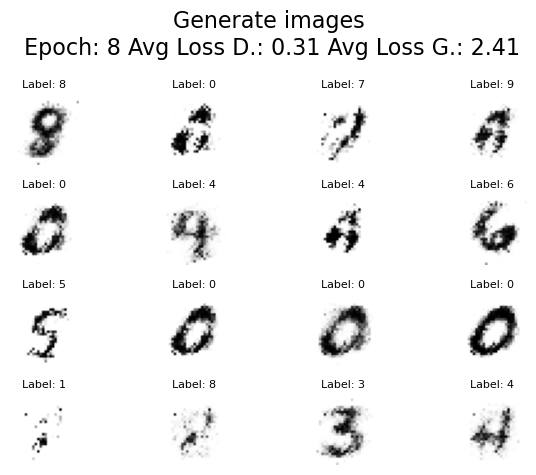

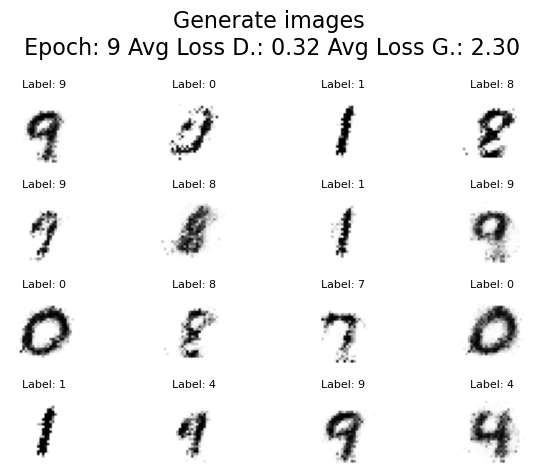

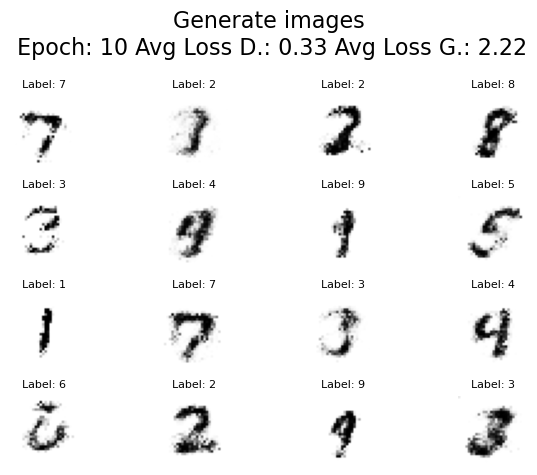

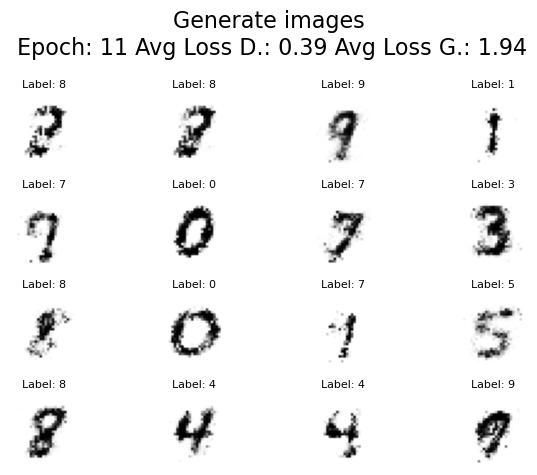

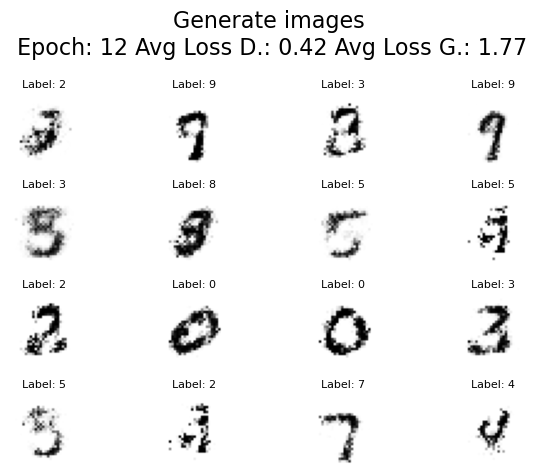

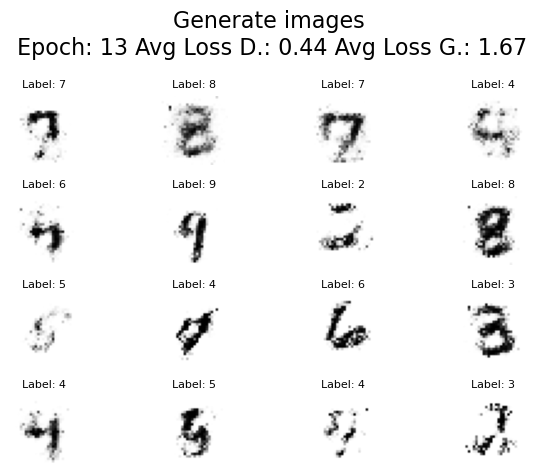

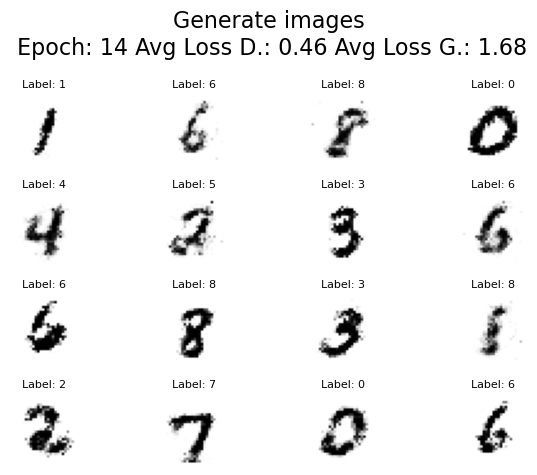

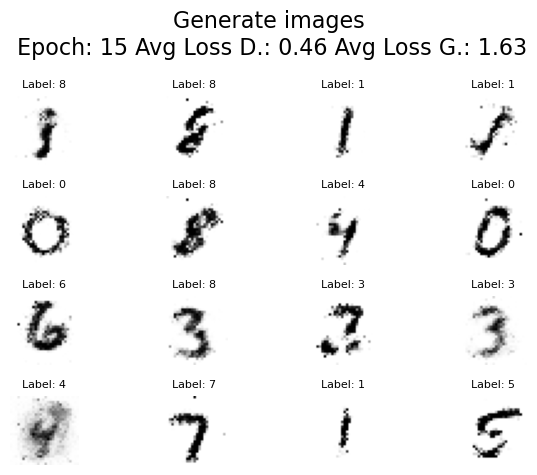

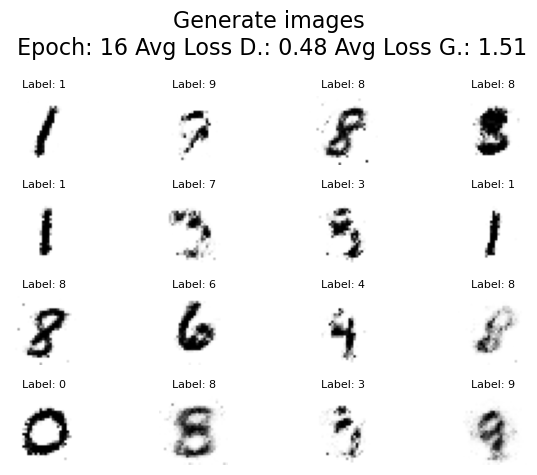

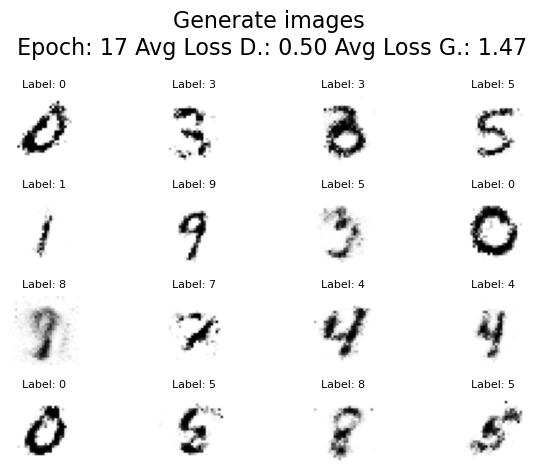

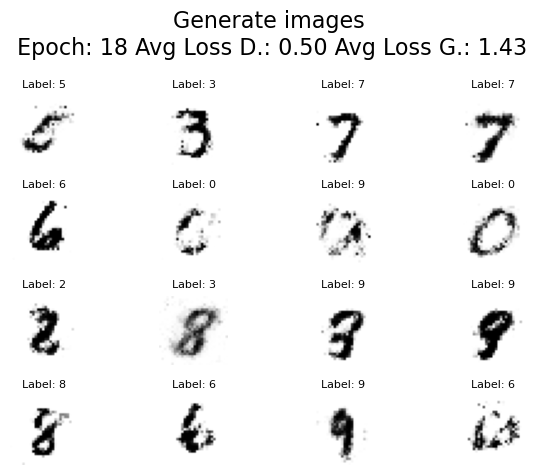

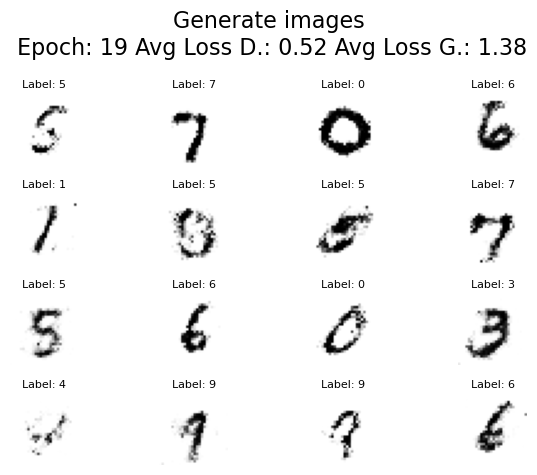

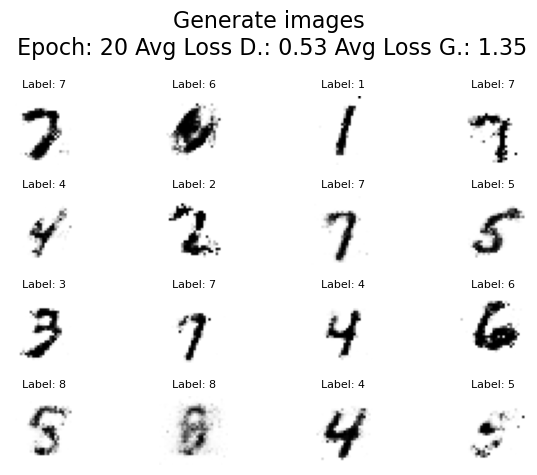

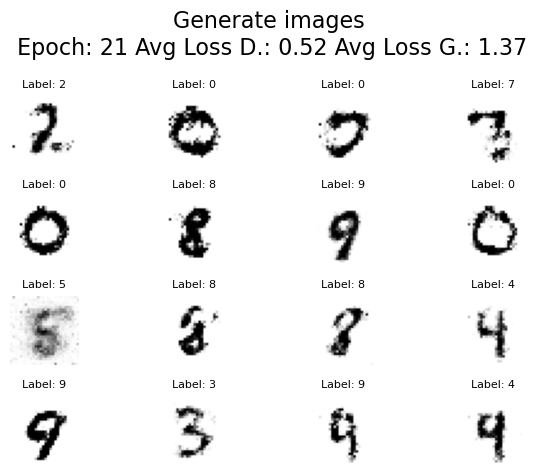

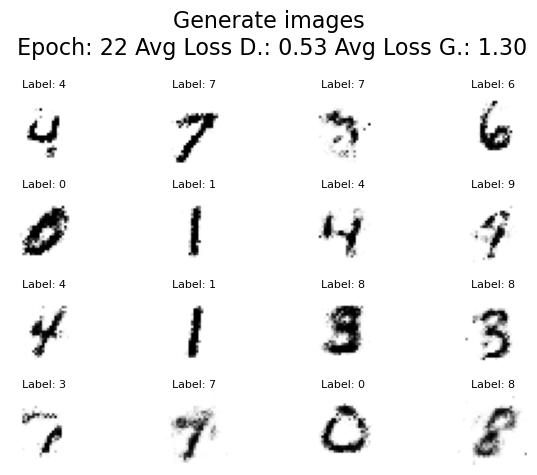

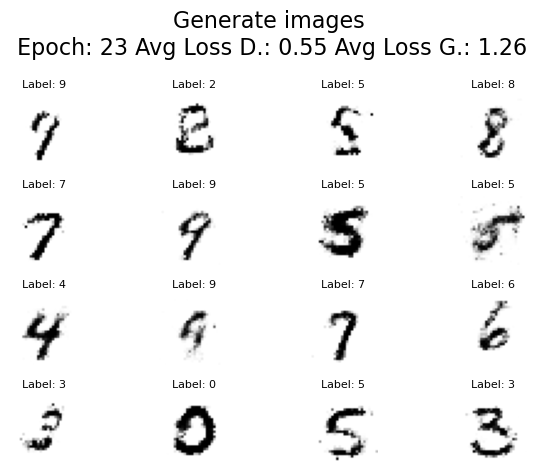

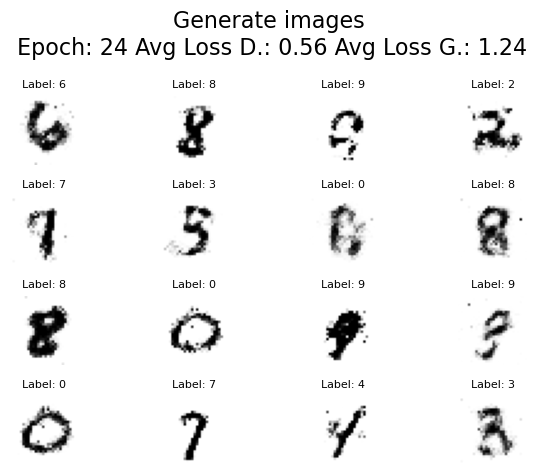

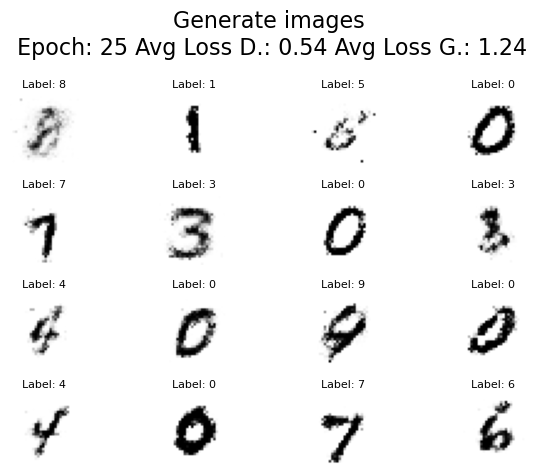

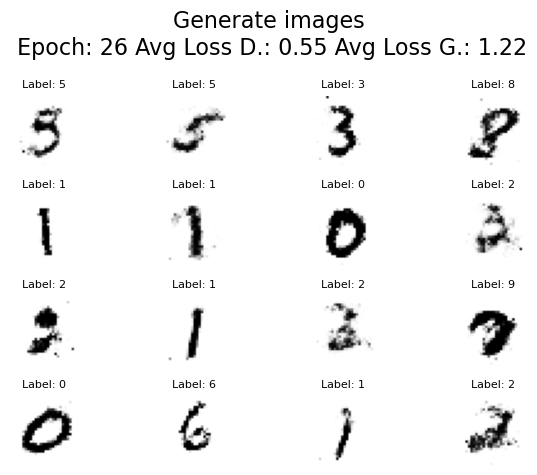

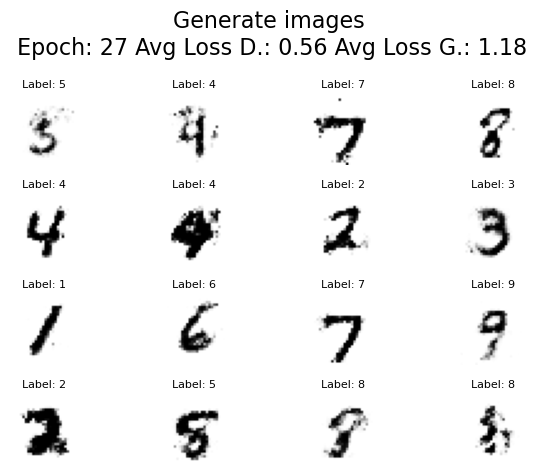

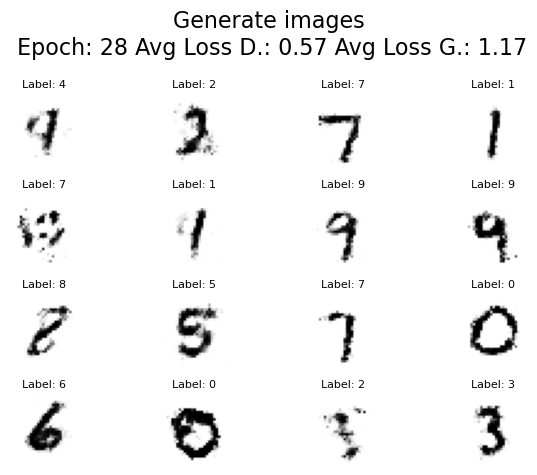

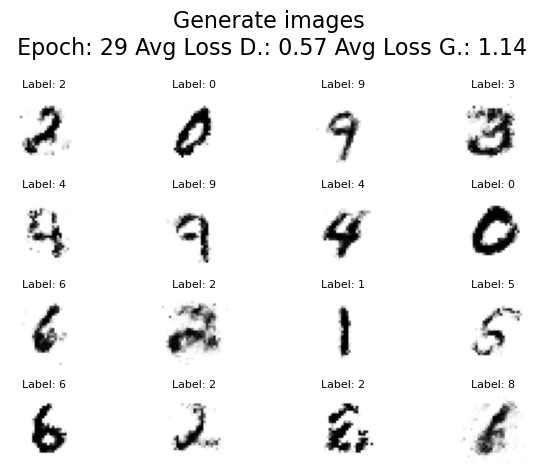

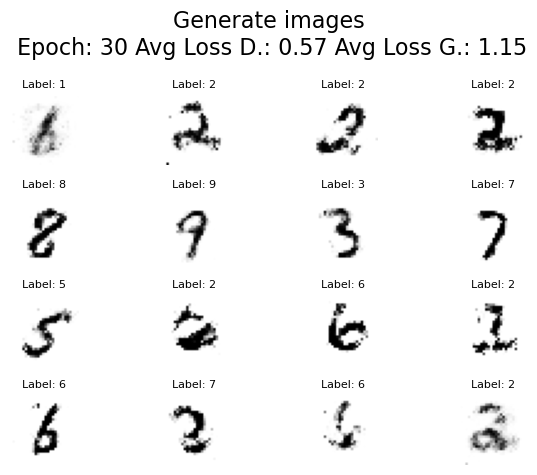

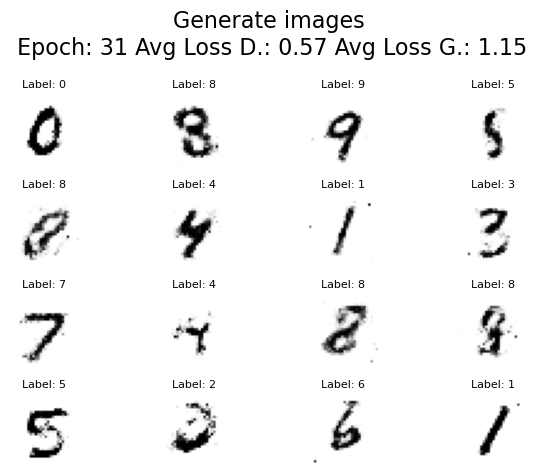

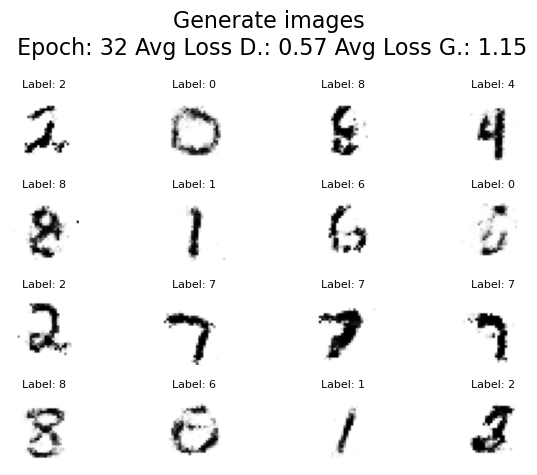

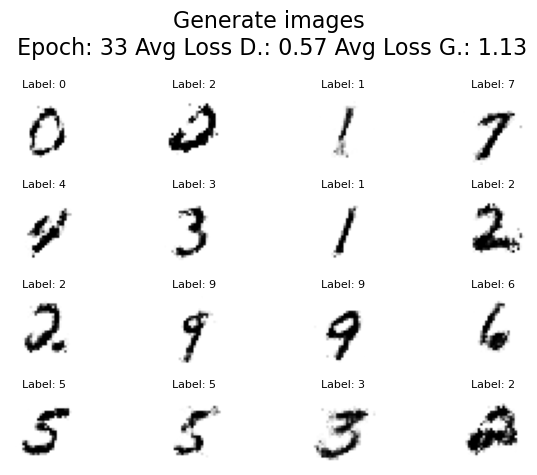

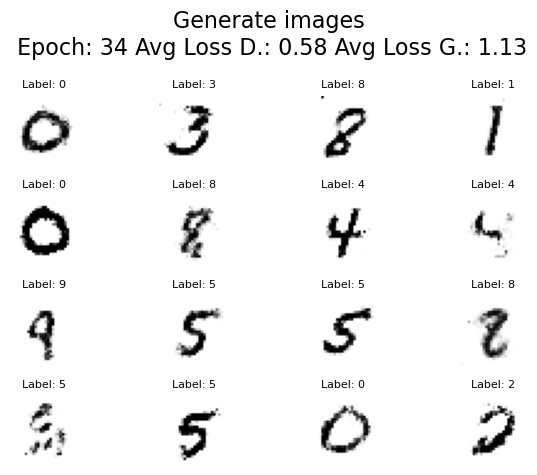

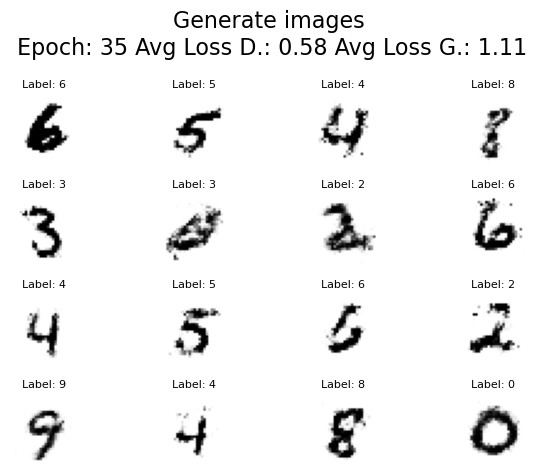

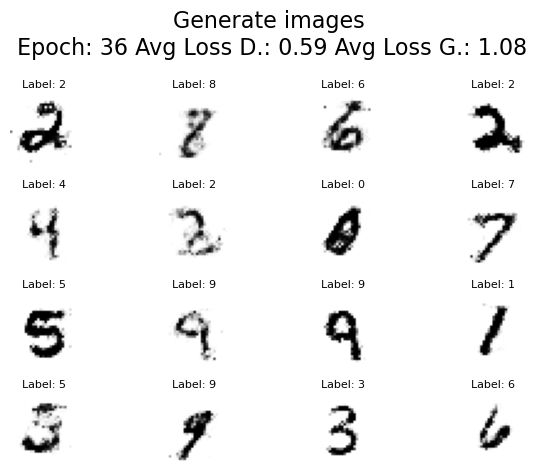

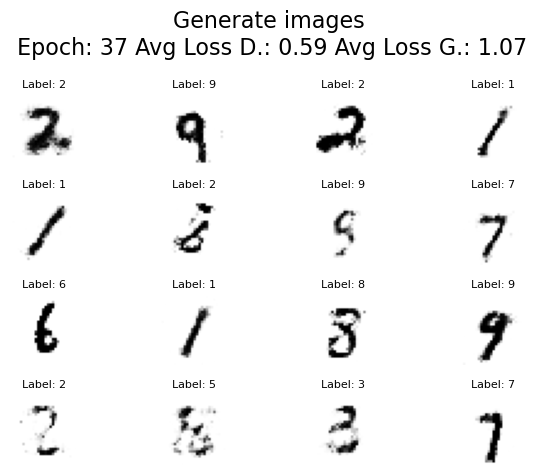

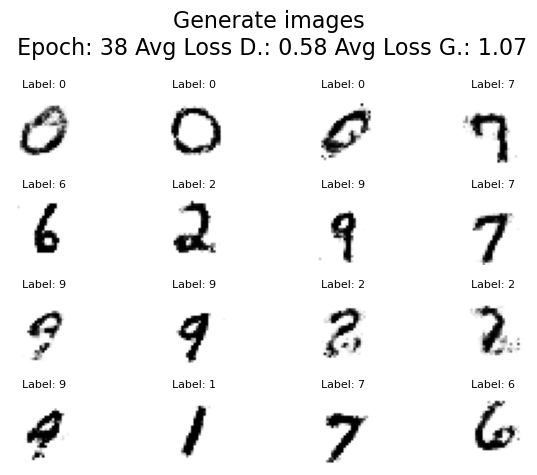

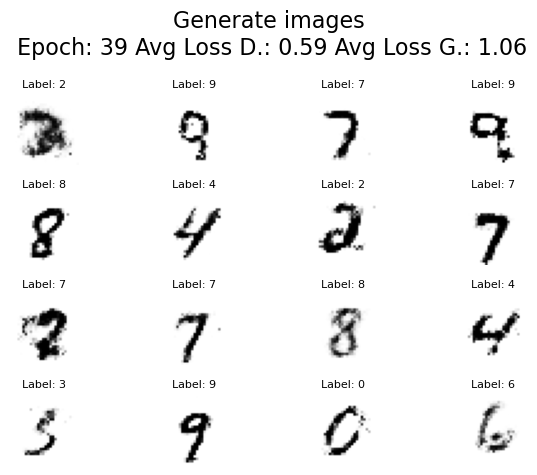

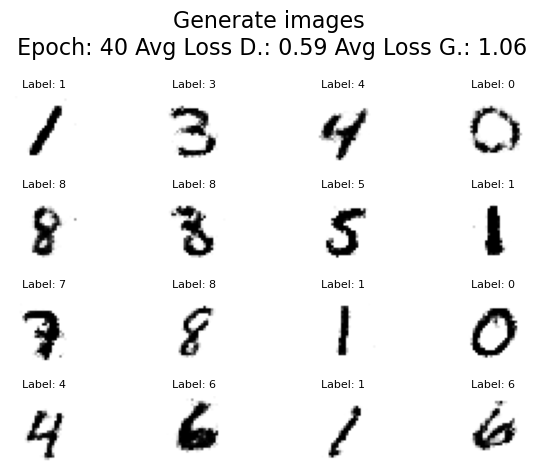

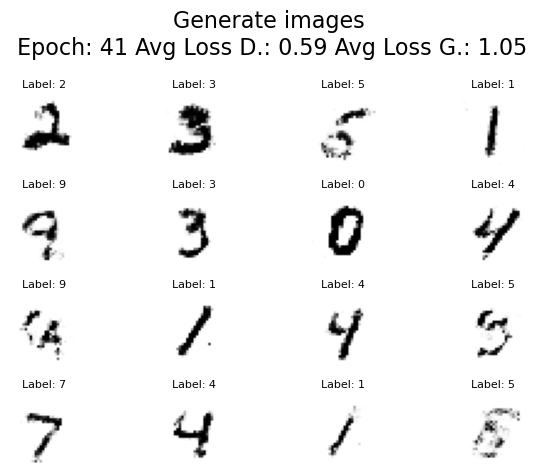

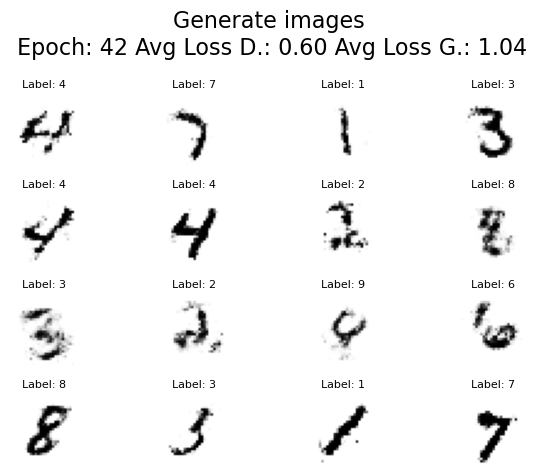

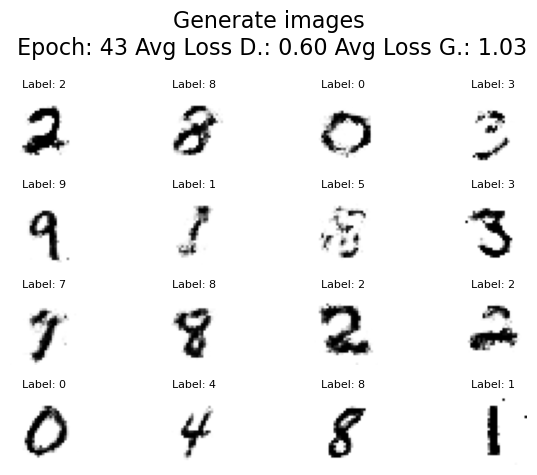

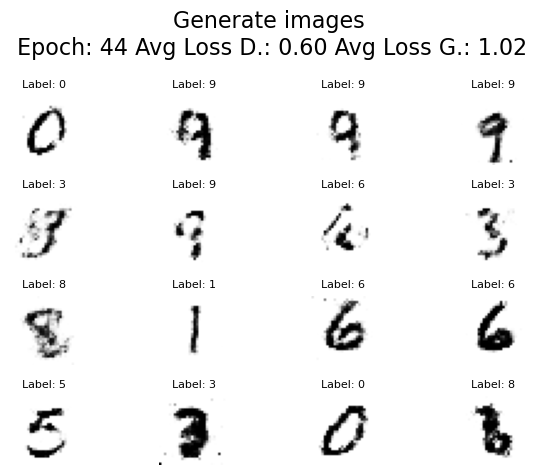

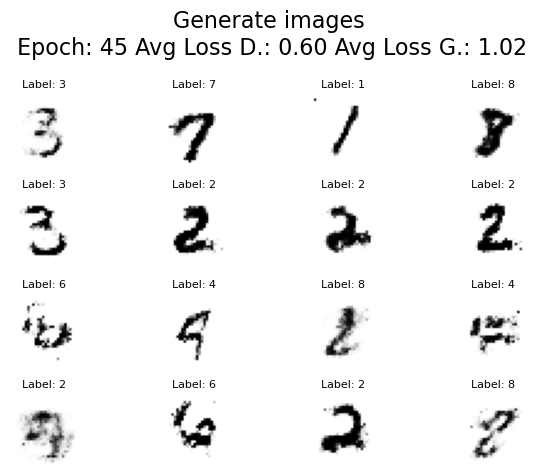

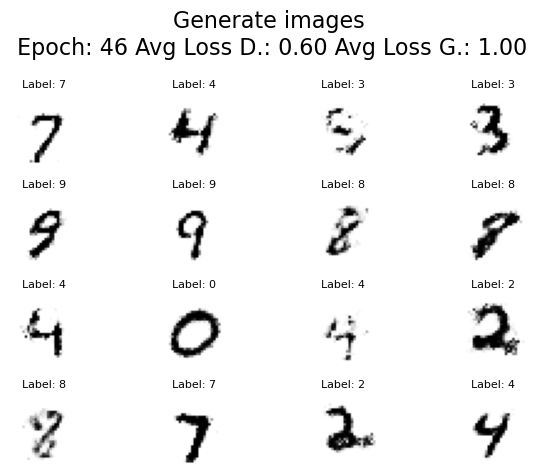

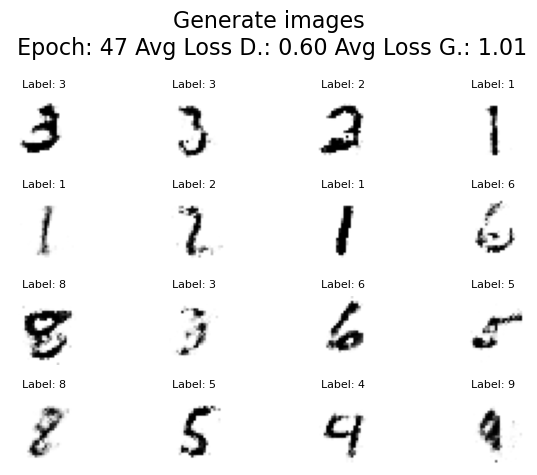

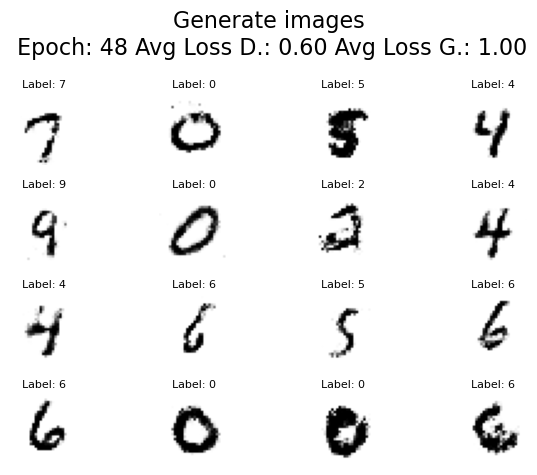

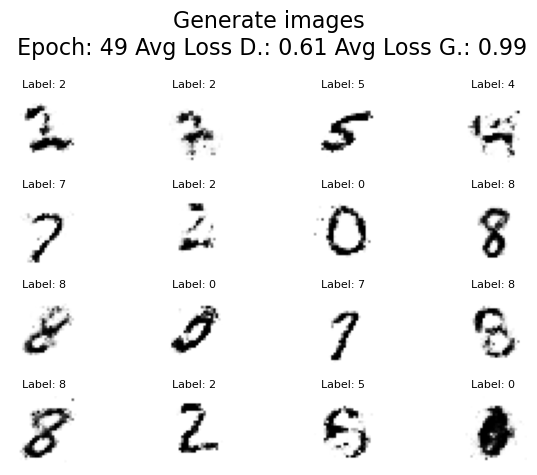

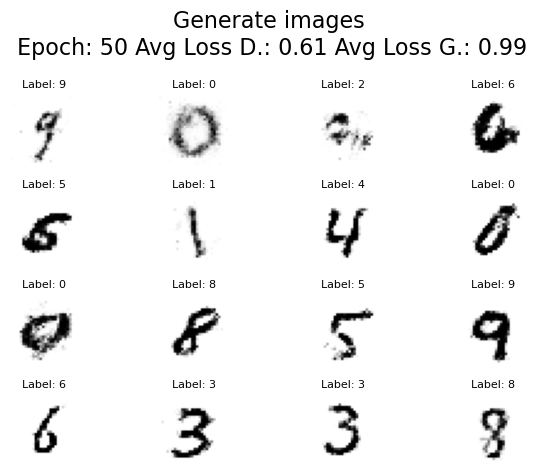

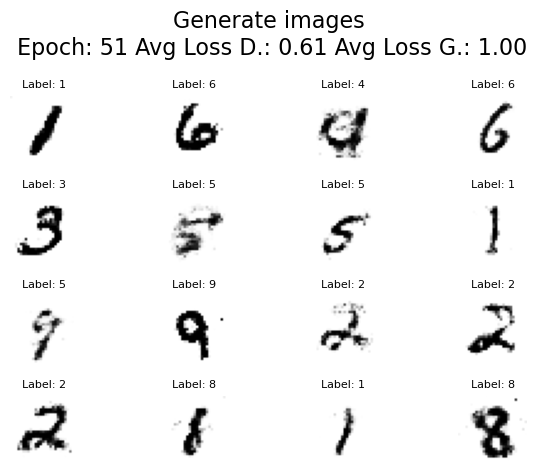

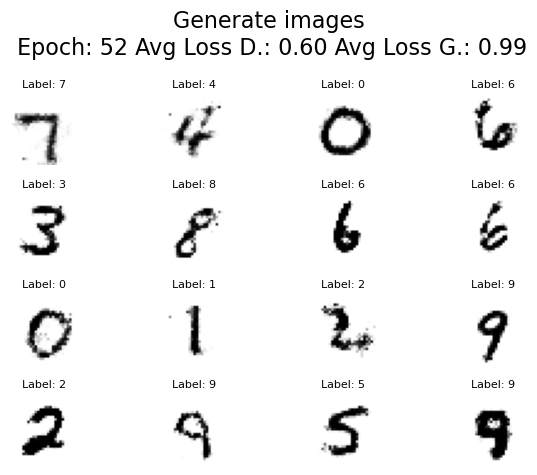

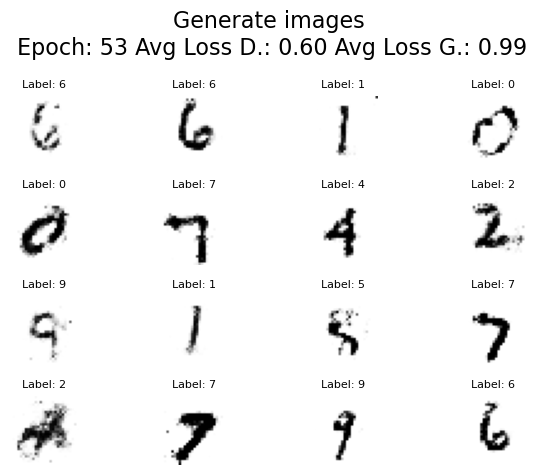

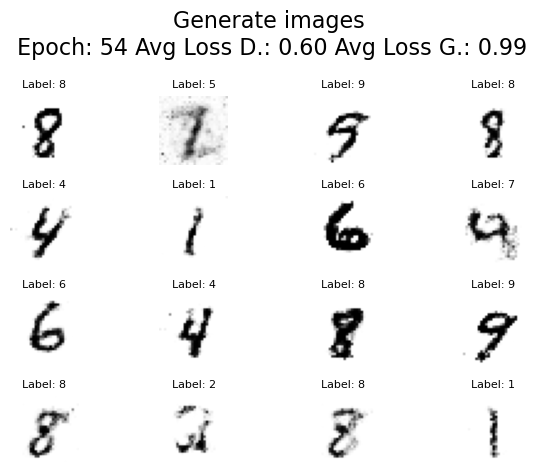

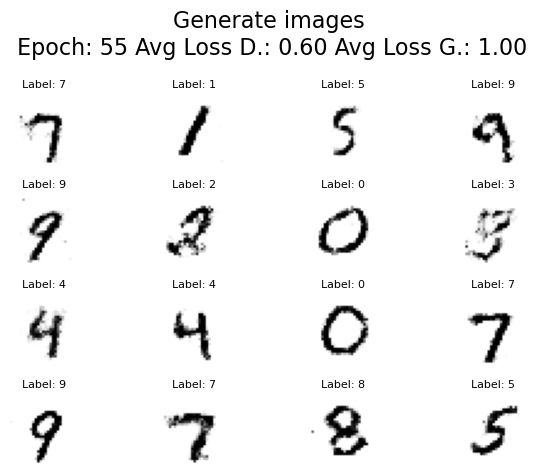

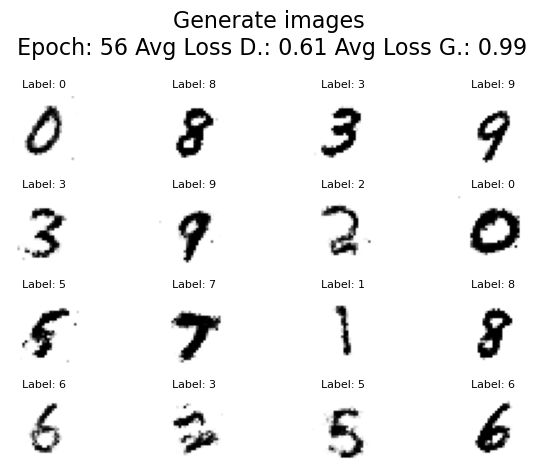

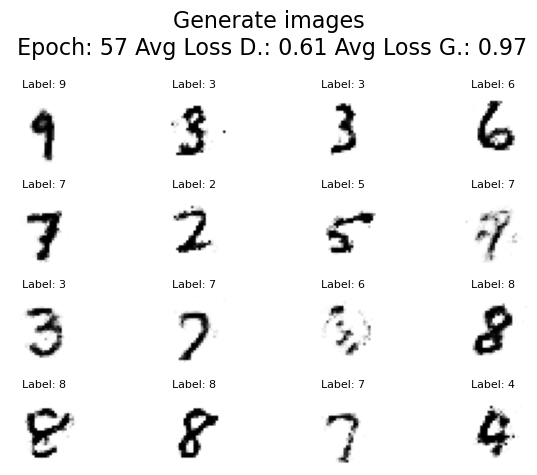

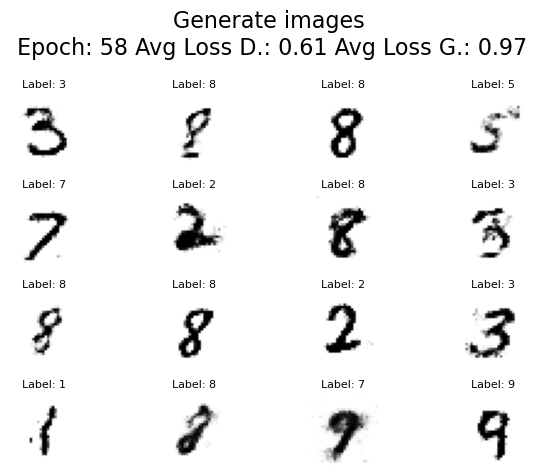

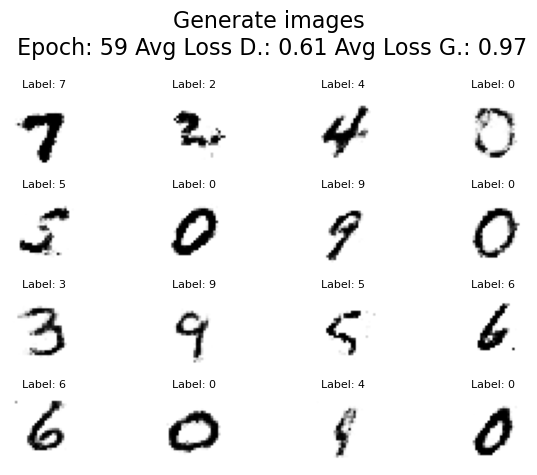

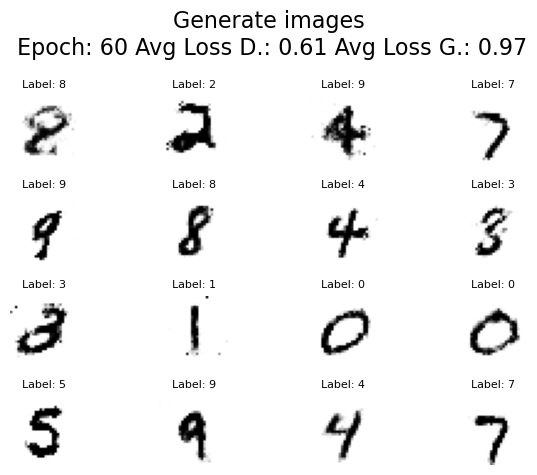

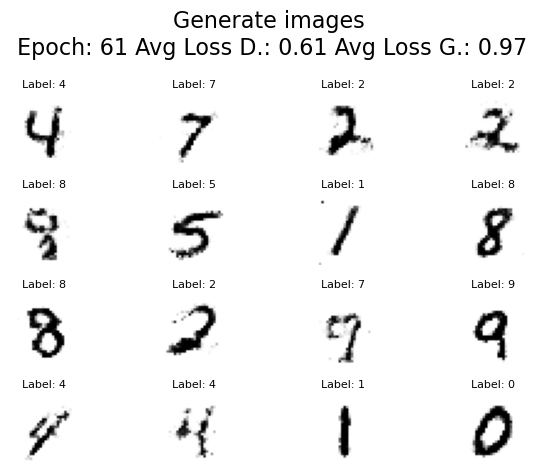

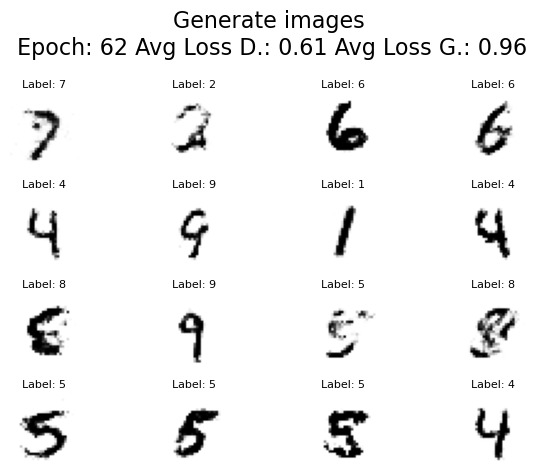

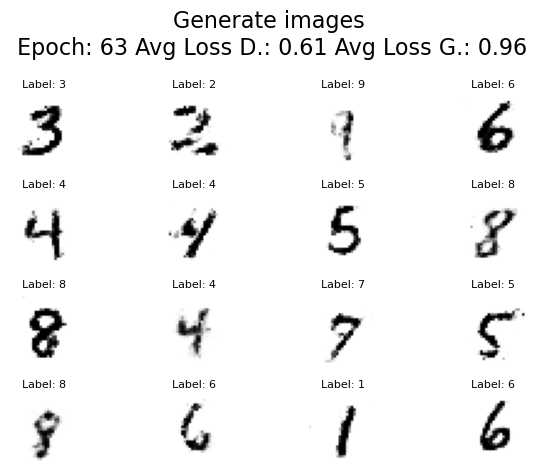

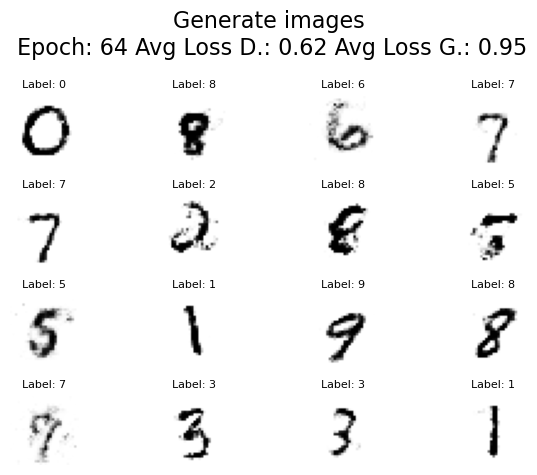

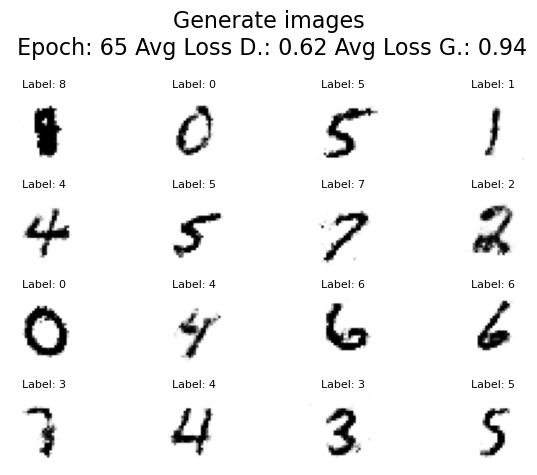

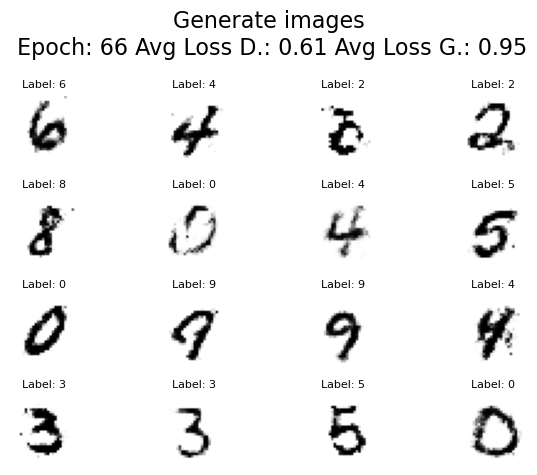

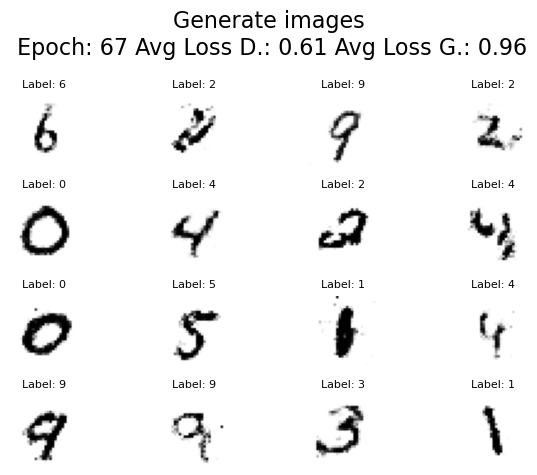

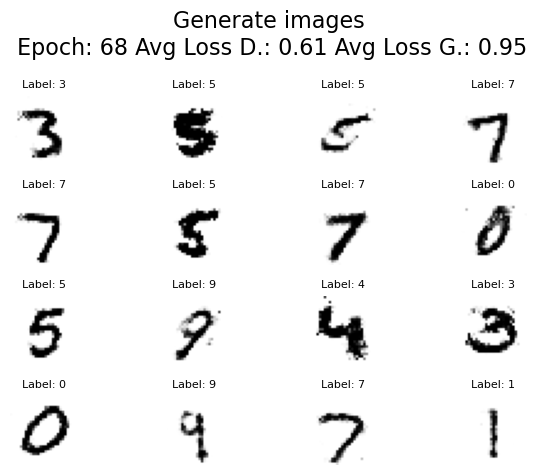

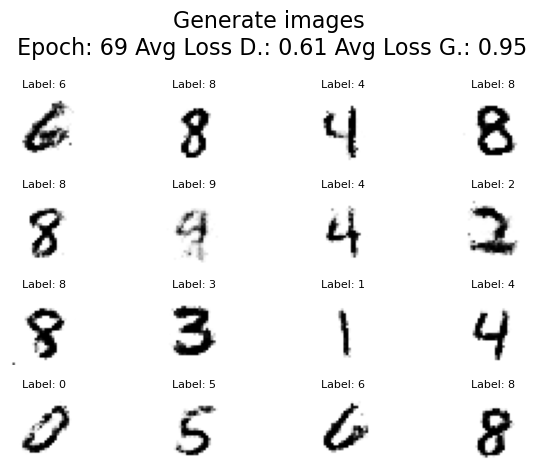

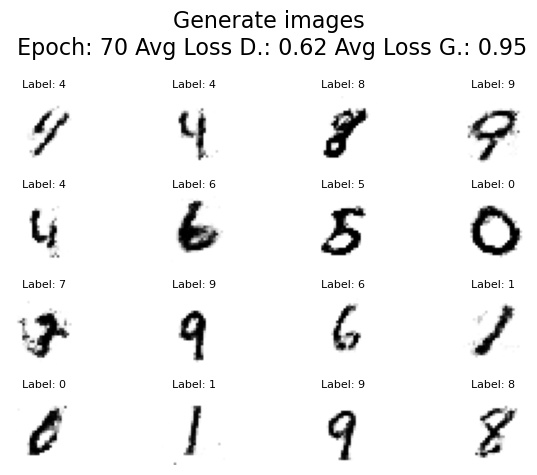

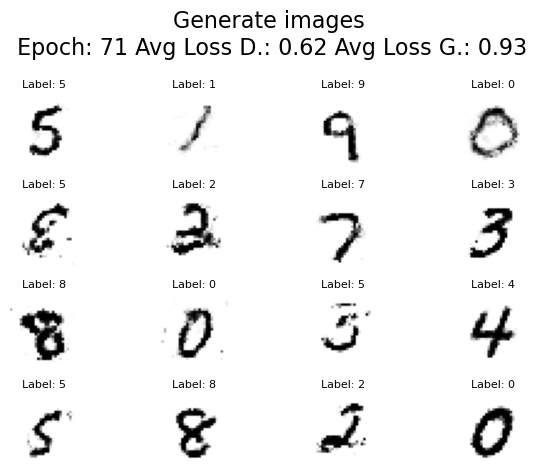

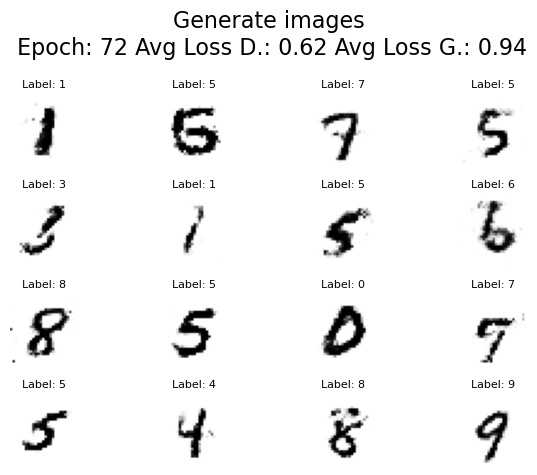

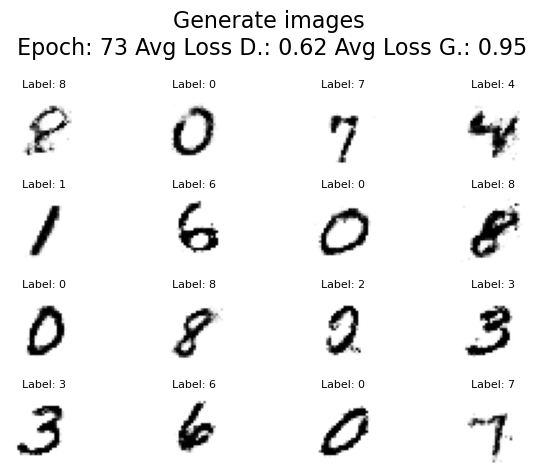

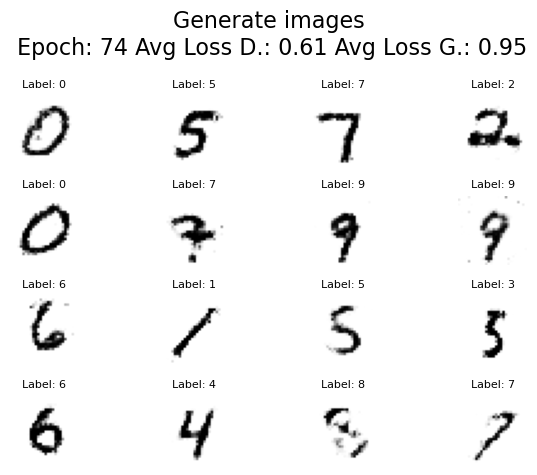

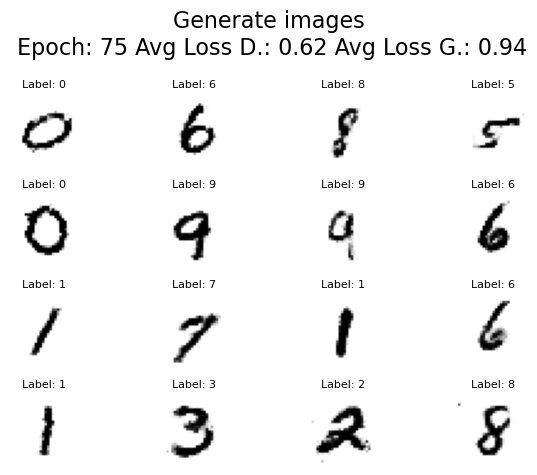

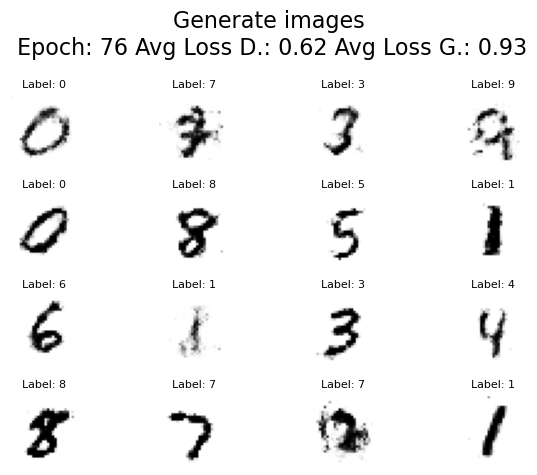

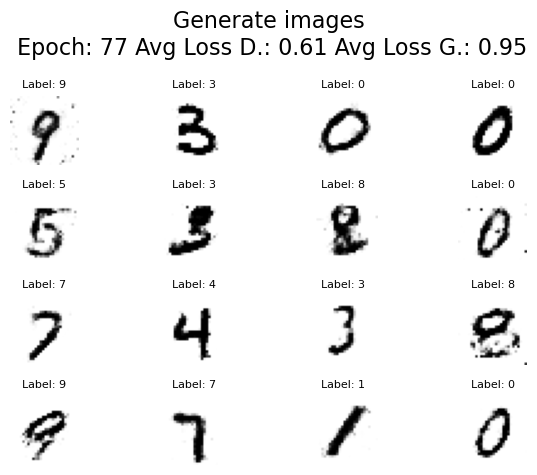

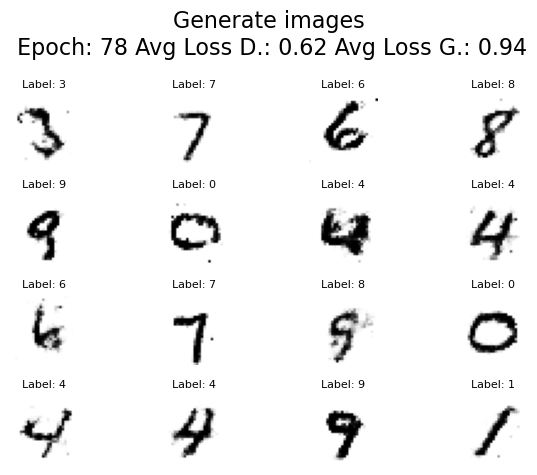

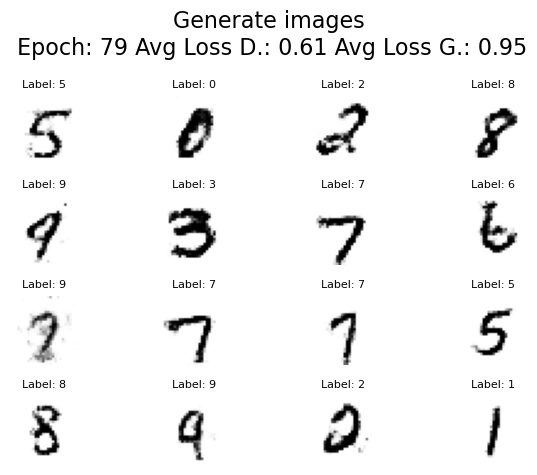

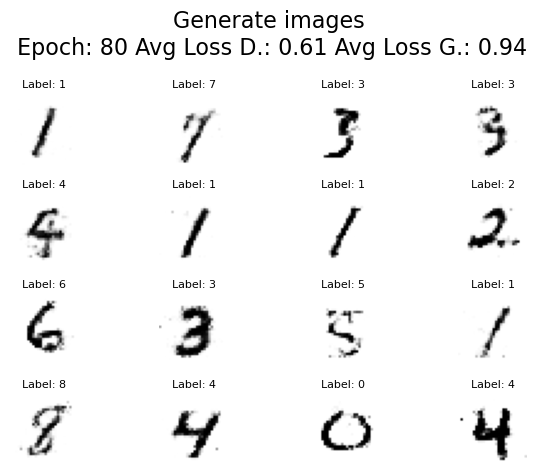

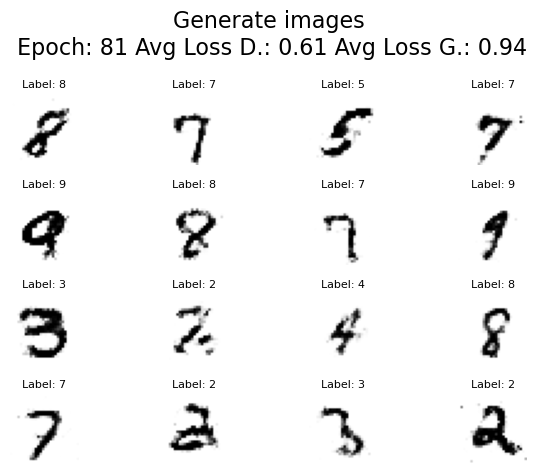

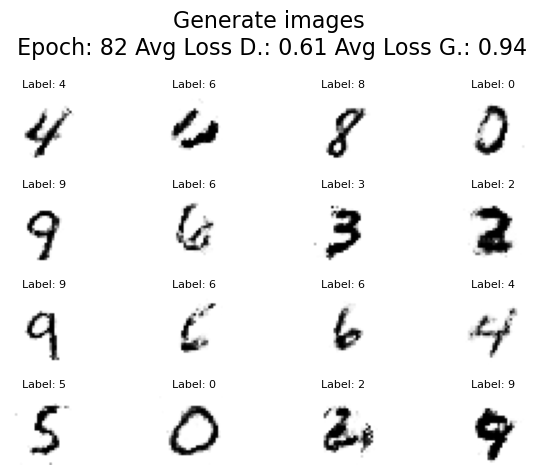

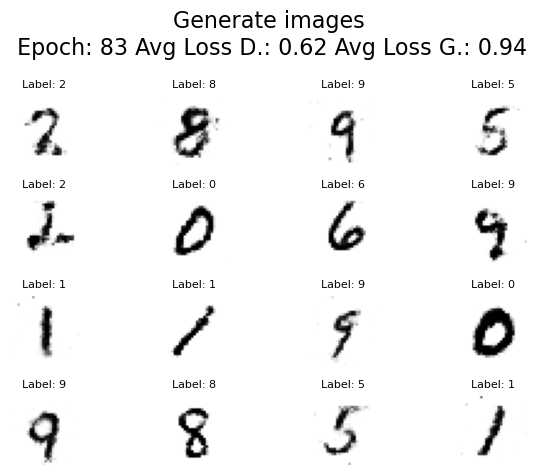

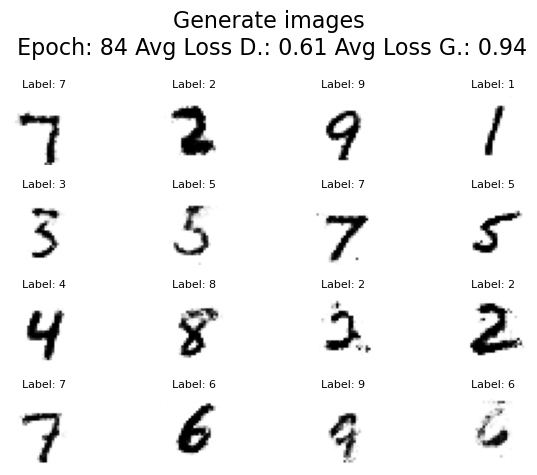

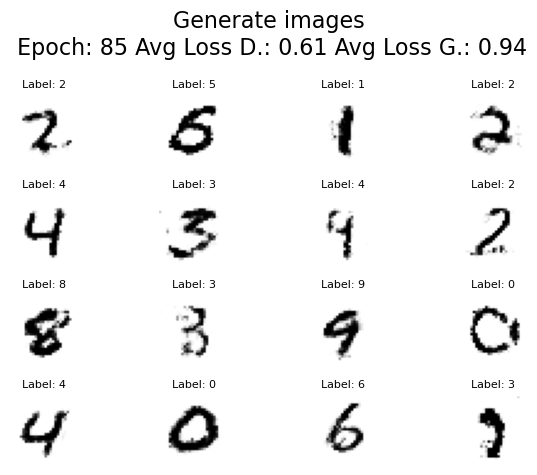

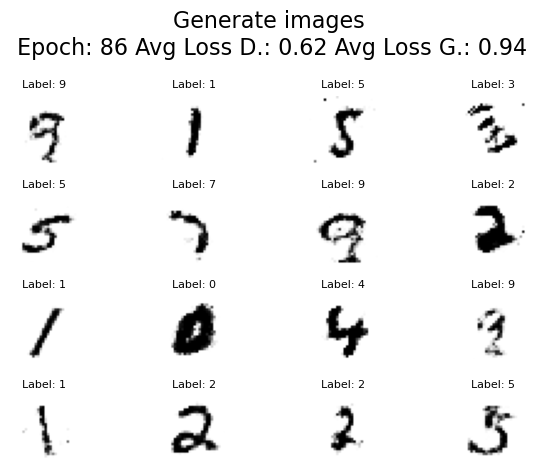

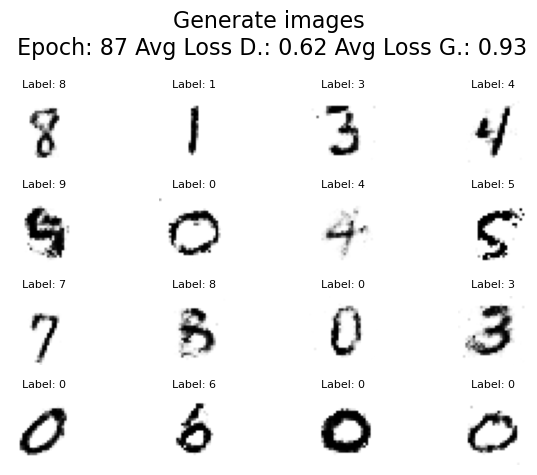

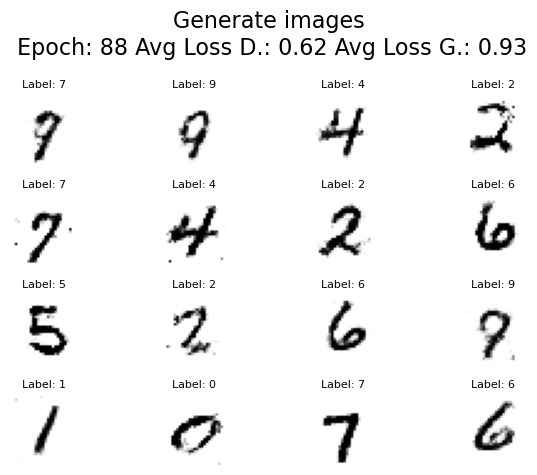

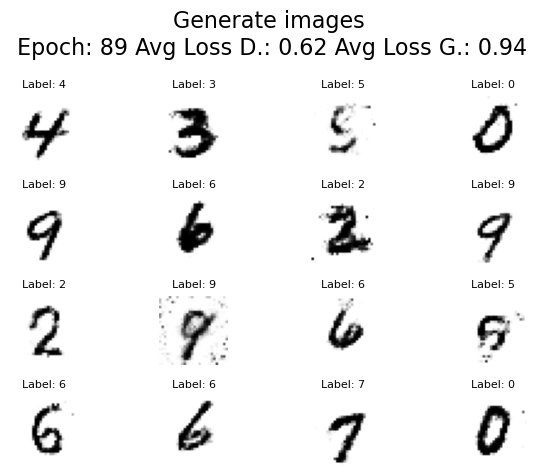

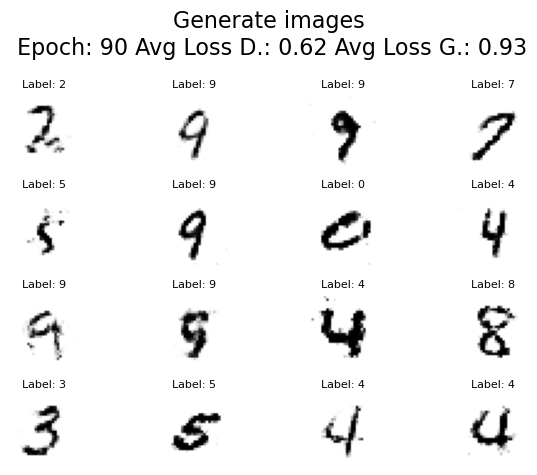

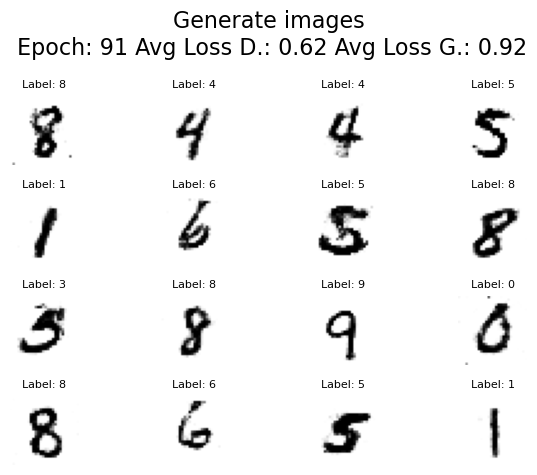

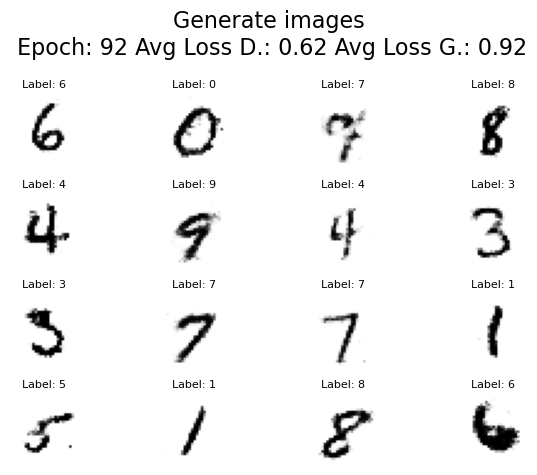

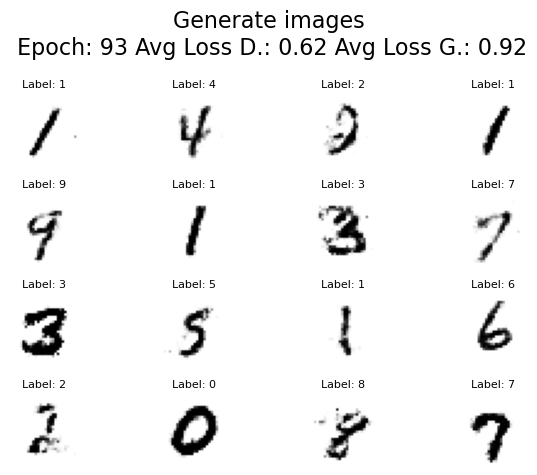

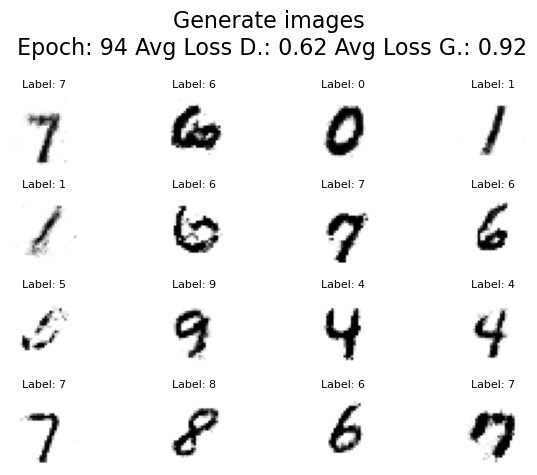

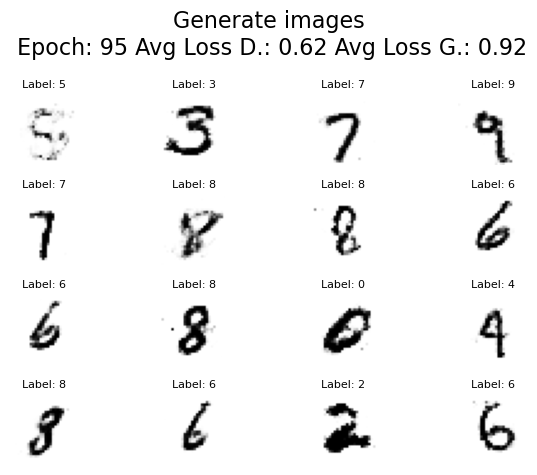

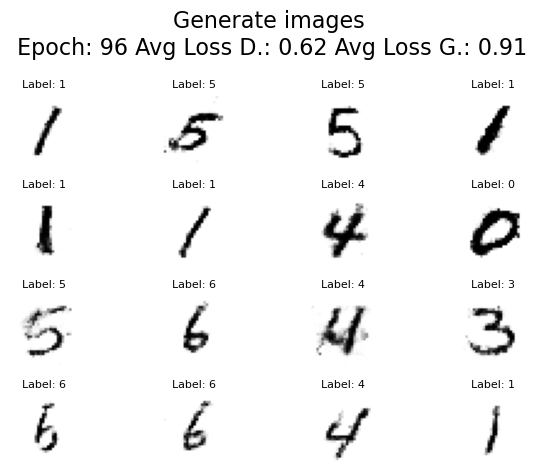

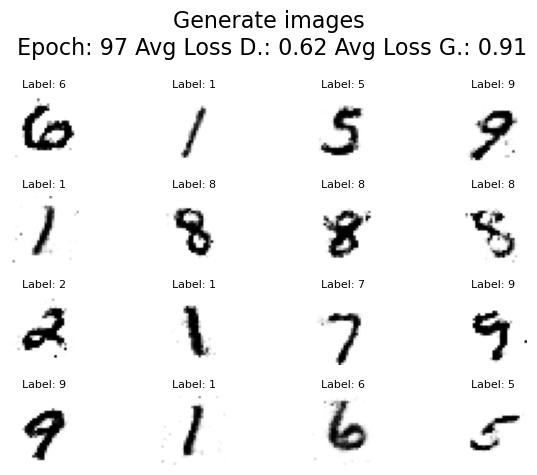

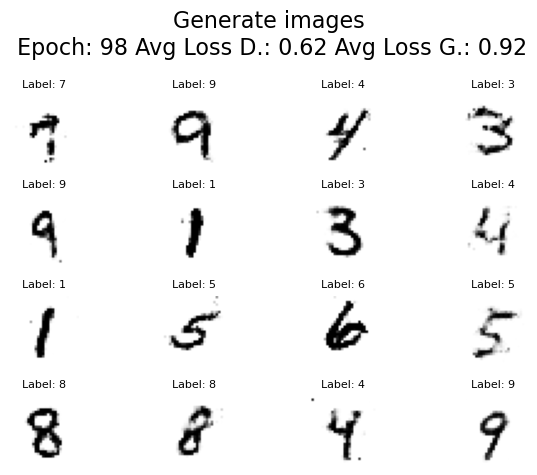

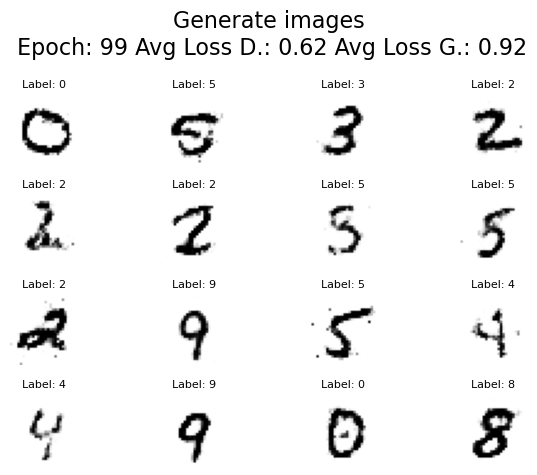

In [24]:
train_gan(batch_size=64, num_epochs=100)
